In [10]:
import matplotlib.pyplot as pl
import numpy as np
import qnm

Text(0, 0.5, 'Slope')

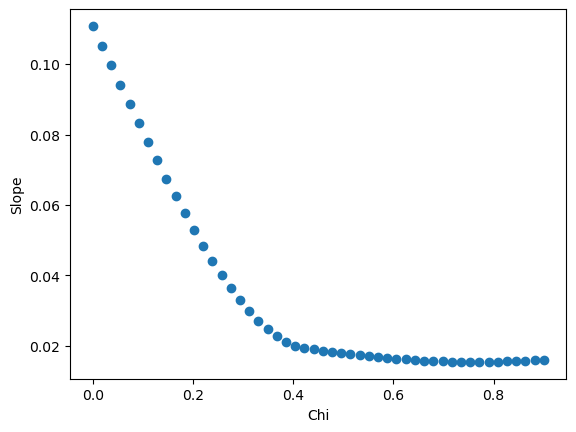

In [12]:
data = np.loadtxt('./results/chi_dependence_ALL.dat')
[chi, slope] = data.T
pl.plot(chi, slope, 'o')
pl.xlabel("Chi")
pl.ylabel("Slope")

In [13]:
def RF_calc(chi, phi=0):
    w220, _, _ = qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=chi)
    w221, _, _ = qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=chi)
    omega220 = np.real(w220)
    tau220 = 1/np.imag(w220)
    filt = (w221-w220)/(w221-np.conj(w220))*(w221+np.conj(w220))/(w221+w220)
    B = np.abs(filt)
    psi = np.arccos(np.real(filt))
    RF = B**2*(1+tau220**2*omega220**2+np.cos(2*(phi+psi))-omega220*tau220*np.sin(2*(phi+psi))/(1+tau220**2*omega220**2+np.cos(2*phi)-tau220*omega220*np.sin(2*phi)))
    return RF, B

In [14]:
chi = 0.0
phi = 0

w220, _, _ = qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=chi)
w221, _, _ = qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=chi)
omega220 = np.real(w220)
tau220 = -1/np.imag(w220)
filt = (w221-w220)/(w221-np.conj(w220))*(w221+np.conj(w220))/(w221+w220)
B = np.abs(filt)
psi = np.arccos(np.real(filt))
RF = B**2*(1+tau220**2*omega220**2+np.cos(2*(phi+psi))-omega220*tau220*np.sin(2*(phi+psi))/(1+tau220**2*omega220**2+np.cos(2*phi)-tau220*omega220*np.sin(2*phi)))

In [15]:
psi

1.0830147805954242

In [16]:
(1+tau220**2*omega220**2+np.cos(2*(phi+psi))-omega220*tau220*np.sin(2*(phi+psi))/(1+tau220**2*omega220**2+np.cos(2*phi)-tau220*omega220*np.sin(2*phi)))

17.905067265848466

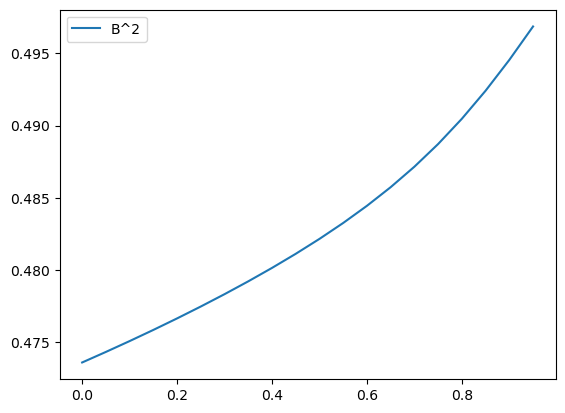

In [17]:
chi_space = np.linspace(0, 0.95, 20)
results = np.array([RF_calc(i) for i in chi_space]).T
# pl.plot(chi_space, 1/results[0], 'o', label="RF")
pl.plot(chi_space, results[1], label="B^2")
pl.legend()

## Fixed chi random phase

Text(0, 0.5, 'Slope')

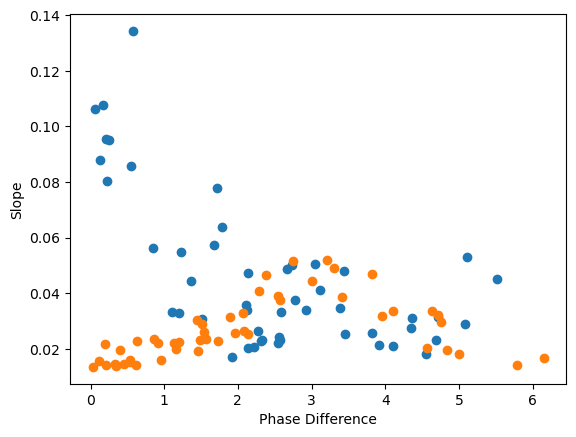

In [19]:
data = np.loadtxt('./results/chi=0.0_random_phase_ALL.dat')
[chi, phase1, phase2, slope] = data.T
pl.plot(abs(phase1-phase2), slope, 'o')

data = np.loadtxt('./results/chi=0.6_random_phase_ALL.dat')
[chi, phase1, phase2, slope] = data.T
pl.plot(abs(phase1-phase2), slope, 'o')

pl.xlabel("Phase Difference")
pl.ylabel("Slope")

In [ ]:
Injected: 220
Filter: 220 + 221 (commutes)